In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import math 
from sklearn.metrics import mean_squared_error

In [103]:
x_train = np.load("./data/x_train.npy")
y_train = np.load("./data/y_train.npy")
x_test = np.load("./data/x_test.npy")
y_test = np.load("./data/y_test.npy")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1368, 30, 1)
(1368,)
(125, 30, 1)
(125,)


In [104]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(30,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 50)            10400     
                                                                 
 lstm_16 (LSTM)              (None, 30, 50)            20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=25,batch_size=32,verbose=1)

Epoch 1/25


2022-02-12 14:35:07.703040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-12 14:35:07.983268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-12 14:35:08.049879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-12 14:35:08.114097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-12 14:35:08.226317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-12 14:35:08.358006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 2/43 [>.............................] - ETA: 2s - loss: 0.0790  

2022-02-12 14:35:08.494754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - ETA: 0s - loss: 0.0204

2022-02-12 14:35:10.726989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-12 14:35:10.837937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-12 14:35:10.896793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-12 14:35:10.964021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 4s 62ms/step - loss: 0.0204 - val_loss: 0.0085
Epoch 2/25
43/43 [==============================] - 2s 38ms/step - loss: 0.0023 - val_loss: 0.0049
Epoch 3/25
43/43 [==============================] - 2s 35ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 4/25
43/43 [==============================] - 1s 35ms/step - loss: 9.9136e-04 - val_loss: 0.0054
Epoch 5/25
43/43 [==============================] - 1s 35ms/step - loss: 9.4488e-04 - val_loss: 0.0035
Epoch 6/25
43/43 [==============================] - 2s 35ms/step - loss: 9.9152e-04 - val_loss: 0.0042
Epoch 7/25
43/43 [==============================] - 2s 35ms/step - loss: 8.6913e-04 - val_loss: 0.0034
Epoch 8/25
43/43 [==============================] - 2s 35ms/step - loss: 7.3127e-04 - val_loss: 0.0056
Epoch 9/25
43/43 [==============================] - 2s 35ms/step - loss: 7.3043e-04 - val_loss: 0.0030
Epoch 10/25
43/43 [==============================] - 2s 35ms/step - loss: 7.1751e-04 - val_loss:

In [111]:
#needed to do here again, purely so can do scaler inverse 
#transform, to be able to calculuse RMSE
df = pd.read_csv('./data/ETH-CAD.csv')
df_close = df.reset_index()['Close']
scaler = MinMaxScaler(feature_range=(0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))



In [112]:
train_predict = model.predict(x_train)
train_predict = scaler.inverse_transform(train_predict)
test_predict = model.predict(x_test)
test_predict = scaler.inverse_transform(test_predict)


In [113]:
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

1354.9338898902947
4709.384104835278


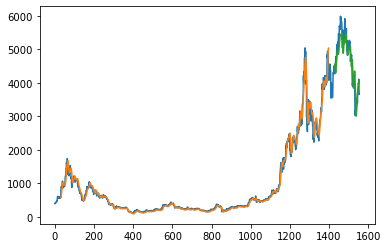

In [114]:
look_back=30
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [115]:
training_size = int(len(df_close)*0.9)
test_size = int(len(df_close)) - training_size
train_data, test_data = df_close[0:training_size:],df_close[training_size:len(df_close),:1]
print(len(test_data))

156


In [116]:
#len(test_data)-num_steps_back is the number to which you index here
x_input=test_data[126:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input


[0.6877214437247214,
 0.6921059383767194,
 0.6961769225212229,
 0.6651806342441507,
 0.6539084633862984,
 0.6400879378218683,
 0.6194384154800967,
 0.5285405637176216,
 0.4958310625886591,
 0.5228539441423146,
 0.5052766516942985,
 0.5082523847235012,
 0.5125095054547973,
 0.5065410005450264,
 0.5343617883292747,
 0.5452268608748088,
 0.546273946540081,
 0.5627570684293299,
 0.5839353284626813,
 0.560183405413768,
 0.5590213712066116,
 0.6291378800496613,
 0.6353873143383993,
 0.6441695190122141,
 0.6583399181605342,
 0.6561745586148612,
 0.6798097047889149,
 0.6478653626273018,
 0.6152329509002842,
 0.6037641710108339]

In [117]:
lst_output=[]
n_steps=30
i=0
while(i<30):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.71164423]
31
1 day input [0.69210594 0.69617692 0.66518063 0.65390846 0.64008794 0.61943842
 0.52854056 0.49583106 0.52285394 0.50527665 0.50825238 0.51250951
 0.506541   0.53436179 0.54522686 0.54627395 0.56275707 0.58393533
 0.56018341 0.55902137 0.62913788 0.63538731 0.64416952 0.65833992
 0.65617456 0.6798097  0.64786536 0.61523295 0.60376417 0.71164423]
1 day output [[0.702956]]
2 day input [0.69617692 0.66518063 0.65390846 0.64008794 0.61943842 0.52854056
 0.49583106 0.52285394 0.50527665 0.50825238 0.51250951 0.506541
 0.53436179 0.54522686 0.54627395 0.56275707 0.58393533 0.56018341
 0.55902137 0.62913788 0.63538731 0.64416952 0.65833992 0.65617456
 0.6798097  0.64786536 0.61523295 0.60376417 0.71164423 0.70295602]
2 day output [[0.70116055]]
3 day input [0.66518063 0.65390846 0.64008794 0.61943842 0.52854056 0.49583106
 0.52285394 0.50527665 0.50825238 0.51250951 0.506541   0.53436179
 0.54522686 0.54627395 0.56275707 0.58393533 0.56018341 0.55902137
 0.62913788 0.63538731 

In [124]:
print(len(df_close))

1555


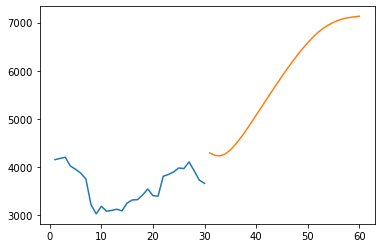

In [128]:
day_new=np.arange(1,31)
day_pred=np.arange(31,61)
#this num is len(df_close)-30
plt.plot(day_new,scaler.inverse_transform(df_close[1525:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

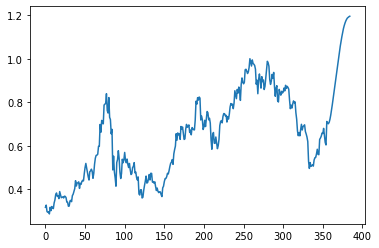

In [129]:
df_new=df_close.tolist()
df_new.extend(lst_output)
plt.plot(df_new[1200:])

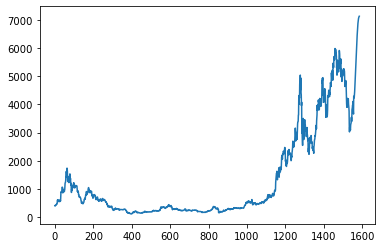

In [130]:
df_new=scaler.inverse_transform(df_new).tolist()
plt.plot(df_new)